# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/basic_s21/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,60,103,50,98,212,63,9,193,34,22,161,214,567,185,64,5,5,198,204
1,91,94,38,84,158,55,9,169,39,20,130,196,430,155,69,9,15,190,195
2,810,97,55,103,197,63,11,215,31,24,172,219,677,219,75,5,24,185,194
3,796,85,38,63,130,55,7,122,55,17,130,137,219,144,64,20,8,195,201
4,177,89,44,72,160,66,7,144,46,19,147,166,312,169,69,11,1,191,198
5,356,91,45,76,171,69,7,150,44,19,144,170,340,179,69,12,1,195,201
6,35,100,46,90,172,67,9,157,43,20,150,170,363,184,67,17,7,192,200
7,440,101,51,98,194,60,10,195,34,22,161,219,572,219,67,0,10,192,201
8,23,87,39,70,148,61,7,143,46,18,136,164,307,141,69,1,2,192,199
9,125,90,46,80,143,62,11,159,43,20,156,169,366,186,74,17,7,185,193


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,428.326047,94.000000,44.897996,82.996357,171.205829,62.149362,8.706740,169.582878,40.701275,20.637523,148.129326,189.573770,443.737705,174.331512,72.087432,6.300546,12.719490,189.342441,196.145719
std,242.388407,8.215838,6.206349,15.646878,34.080458,8.606329,5.063427,32.974318,7.770547,2.575455,14.438507,31.477899,174.796964,33.024755,7.578519,5.017744,9.007175,6.088103,7.368846
min,0.000000,73.000000,33.000000,42.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,109.000000,59.000000,0.000000,0.000000,176.000000,182.000000
25%,213.000000,88.000000,40.000000,70.000000,144.000000,57.000000,7.000000,148.000000,33.000000,19.000000,136.000000,168.000000,321.000000,149.000000,67.000000,2.000000,6.000000,185.000000,191.000000
50%,429.000000,93.000000,44.000000,81.000000,169.000000,61.000000,8.000000,158.000000,42.000000,20.000000,146.000000,179.000000,369.000000,174.000000,71.000000,5.000000,11.000000,189.000000,197.000000
75%,639.000000,100.000000,50.000000,98.000000,197.000000,65.000000,10.000000,200.000000,46.000000,23.000000,160.000000,217.000000,600.000000,199.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,59.000000,29.000000,188.000000,320.000000,1018.000000,262.000000,135.000000,22.000000,39.000000,203.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
0     549 non-null int64
1     549 non-null int64
2     549 non-null int64
3     549 non-null int64
4     549 non-null int64
5     549 non-null int64
6     549 non-null int64
7     549 non-null int64
8     549 non-null int64
9     549 non-null int64
10    549 non-null int64
11    549 non-null int64
12    549 non-null int64
13    549 non-null int64
14    549 non-null int64
15    549 non-null int64
16    549 non-null int64
17    549 non-null int64
18    549 non-null int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [6]:
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings('ignore', category=ConvergenceWarning)

n_samples = X_train.shape[0]
n_features = X_train.shape[1]

transformer = StandardScaler()
X_train_norm = transformer.fit_transform(X_train)
X_test_norm = transformer.transform(X_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [7]:
from scikitplot.metrics import plot_roc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

In [8]:
model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
space = {
    'penalty' : ['l2', 'l1'],
    'C' : [1.0, 5, 10, 50, 20, 60, 40, 500, 200, 0.01, 1e-3, 0.1, 1000, 2000, 1e6, 1e4, 1e-2, 1e5]
}
search_logreg = GridSearchCV(model, space, n_jobs=-1)

In [9]:
search_logreg.fit(X_train_norm, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=500,
                                          multi_class='multinomial',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='saga',
                                          tol=0.001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1.0, 5, 10, 50, 20, 60, 40, 500, 200, 0.01,
                               0.001, 0.1, 1000, 2000, 1000000.0, 10000.0, 0.01,
                               100000.0],
                         'penalty': ['l2', 'l1']},
             pre_dispatch='2*n_jobs', refit=True, retur

In [10]:
search_logreg.best_params_

{'C': 50, 'penalty': 'l1'}

In [11]:
result_logreg = search_logreg.best_estimator_
y_pred = result_logreg.predict(X_test_norm)
predicted_proba = result_logreg.predict_proba(X_test_norm)
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
print("f1 score for each class: {}".format(f1_score(y_test, y_pred, average=None)))
print("f1_score_averaged: {}".format(f1_score(y_test, y_pred, average='macro')))

Accuracy: 0.7777777777777778
f1 score for each class: [0.95121951 0.57342657 0.61333333 0.96350365]
f1_score_averaged: 0.7753707671475163


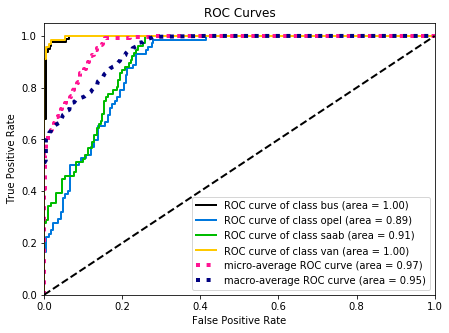

In [12]:
plot_roc(y_test, predicted_proba, figsize=(7, 5))

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

Text(0, 0.5, 'explained_variance')

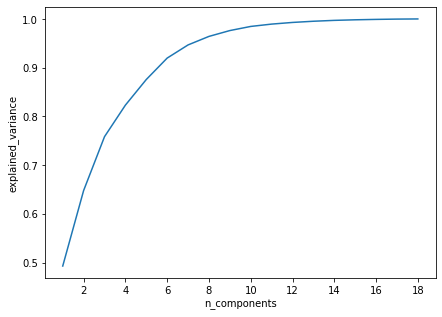

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

n_components = min(n_samples, n_features)

# используем X_train_norm, т.к. для PCA нужны нормализованные данные
x = list(range(1, n_components))
y = list()
for i in range(1, n_components):
    pca = PCA(n_components=i)
    pca.fit(X_train_norm)
    y.append(sum(pca.explained_variance_ratio_))


plt.rcParams["figure.figsize"] = (7, 5)
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.plot(x, y)
plt.xlabel('n_components')
plt.ylabel('explained_variance')

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [14]:
pca_transformation = PCA(n_components=12) # выбираем 12 компонент, потому что при таком количестве компонент 
                                         # практически вся дисперсия учитывается, что видно из графика выше
# перед PCA нужно нормализовать данные, поэтому берем отнормированные X_train_norm, X_test_norm
X_train_pca = pca_transformation.fit_transform(X_train_norm)
X_test_pca = pca_transformation.transform(X_test_norm)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [15]:
model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3)
space = {
    'penalty' : ['l2', 'l1'],
    'C' : [1.0, 5, 10, 50, 20, 60, 40, 500, 200, 0.01, 1e-3, 0.1, 1000, 2000, 1e6, 1e4, 1e-2, 1e5]
}
search_logreg_pca = GridSearchCV(model, space, n_jobs=-1)

In [16]:
result = search_logreg_pca.fit(X_train_pca, y_train)

In [17]:
y_pred = search_logreg_pca.predict(X_test_pca)
predicted_proba = search_logreg_pca.predict_proba(X_test_pca)
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
print("f1 score for each class: {}".format(f1_score(y_test, y_pred, average=None)))
print("f1 score averaged: {}".format(f1_score(y_test, y_pred, average='macro')))

Accuracy: 0.7037037037037037
f1 score for each class: [0.85365854 0.47945205 0.53061224 0.94890511]
f1 score averaged: 0.7031569864417242


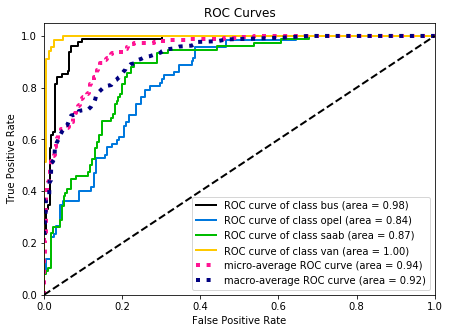

In [18]:
plot_roc(y_test, predicted_proba, figsize=(7, 5))

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [19]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
space = {
    'max_depth' : list(range(1, n_features))
}

search_tree = GridSearchCV(model, space, n_jobs=-1)

In [20]:
result = search_tree.fit(X_train_pca, y_train)

In [21]:
y_pred = search_tree.predict(X_test_pca)
predicted_proba = search_tree.predict_proba(X_test_pca)
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
print("f1 score for each class: {}".format(f1_score(y_test, y_pred, average=None)))
print("f1 score averaged: {}".format(f1_score(y_test, y_pred, average='macro')))

Accuracy: 0.5925925925925926
f1 score for each class: [0.71590909 0.44285714 0.42253521 0.76470588]
f1 score averaged: 0.5865018318466951


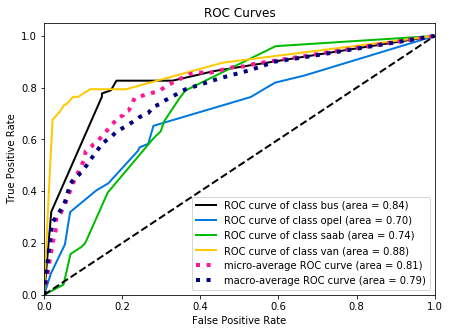

In [22]:
plot_roc(y_test, predicted_proba, figsize=(7, 5))

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

n_opt for accuracy score = 7
n_opt for f1 score = 7


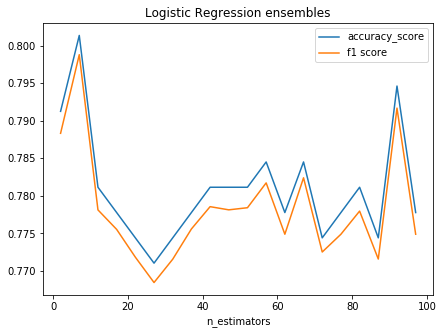

In [25]:
from sklearn.ensemble import BaggingClassifier

N_max = 100
accuracy_scores = list()
f1_scores = list()

estimator = search_logreg.best_estimator_
for i in range(2, N_max + 1, 5):
    clf = BaggingClassifier(base_estimator=estimator, n_estimators=i, n_jobs=-1)
    clf.fit(X_train_norm, y_train)
    y_pred = clf.predict(X_test_norm)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))
    
x = np.arange(2, N_max + 1, 5)    
plt.plot(x, accuracy_scores, label='accuracy_score')
plt.plot(x, f1_scores, label='f1 score')
plt.legend()
plt.xlabel('n_estimators')
plt.title(label='Logistic Regression ensembles')
n_opt_logreg = x[np.argmax(np.array(accuracy_scores))]
print('n_opt for accuracy score = {}'.format(x[np.argmax(np.array(accuracy_scores))]))
print('n_opt for f1 score = {}'.format(x[np.argmax(np.array(f1_scores))]))

n_opt for accuracy score = 22
n_opt for f1 score = 22


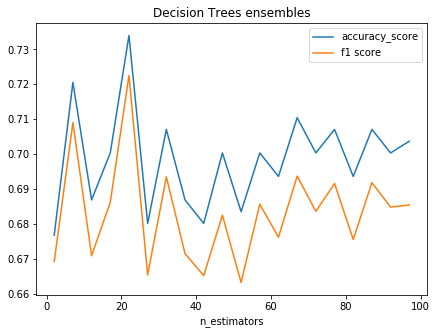

In [26]:
from sklearn.ensemble import BaggingClassifier

N_max = 100
accuracy_scores = list()
f1_scores = list()
for i in range(2, N_max + 1, 5):
    clf = BaggingClassifier(base_estimator=search_tree.best_estimator_, n_estimators=i, n_jobs=-1)
    clf.fit(X_train_norm, y_train)
    y_pred = clf.predict(X_test_norm)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))
x = np.arange(2, N_max + 1, 5)    
plt.plot(x, accuracy_scores, label='accuracy_score')
plt.plot(x, f1_scores, label='f1 score')
plt.legend()
plt.xlabel('n_estimators')
plt.title(label='Decision Trees ensembles')
n_opt_tree = x[np.argmax(np.array(accuracy_scores))]
print('n_opt for accuracy score = {}'.format(x[np.argmax(np.array(accuracy_scores))]))
print('n_opt for f1 score = {}'.format(x[np.argmax(np.array(f1_scores))]))

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

n_opt for accuracy score = 32
n_opt for f1 score = 32


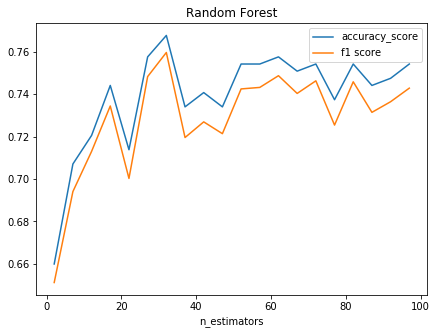

In [27]:
from sklearn.ensemble import RandomForestClassifier
    
accuracy_scores = list()
f1_scores = list()    
for i in range(2, N_max + 1, 5):
    clf = RandomForestClassifier(n_estimators=i, n_jobs=-1)
    clf.fit(X_train_norm, y_train)
    y_pred = clf.predict(X_test_norm)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))
    
x = np.arange(2, N_max + 1, 5)    
plt.plot(x, accuracy_scores, label='accuracy_score')
plt.plot(x, f1_scores, label='f1 score')
plt.legend()
plt.xlabel('n_estimators')
plt.title(label='Random Forest')
n_opt_rf = x[np.argmax(np.array(accuracy_scores))]
print('n_opt for accuracy score = {}'.format(x[np.argmax(np.array(accuracy_scores))]))
print('n_opt for f1 score = {}'.format(x[np.argmax(np.array(f1_scores))]))

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [28]:
train_parts = list()
train_labels = list()
n_samples = X_train.shape[0]

for i in range(9):
    part = X_train_norm[:n_samples//10 * (i + 1), :]
    part_labels = y_train[:n_samples//10 * (i + 1)]
    train_parts.append(part)  
    train_labels.append(part_labels)

train_parts.append(X_train_norm)    
train_labels.append(y_train)

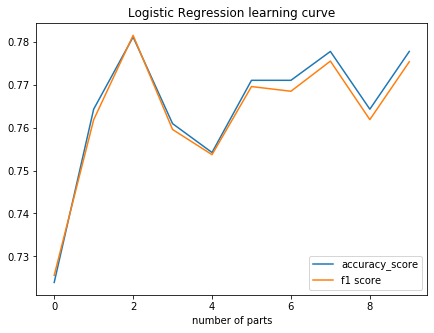

In [29]:
#1. Logistic regression

log_regr = search_logreg.best_estimator_
accuracy_scores_logreg = list()
f1_scores_logreg = list()
for i in range(len(train_parts)):
    X, y = train_parts[i], train_labels[i]
    log_regr.fit(X, y)
    y_pred = log_regr.predict(X_test_norm)
    accuracy_scores_logreg.append(accuracy_score(y_test, y_pred))
    f1_scores_logreg.append(f1_score(y_test, y_pred, average='macro'))

x = np.arange(10)
plt.plot(x, accuracy_scores_logreg, label='accuracy_score')
plt.plot(x, f1_scores_logreg, label='f1 score')
plt.xlabel('number of parts')
plt.title('Logistic Regression learning curve')
plt.legend()

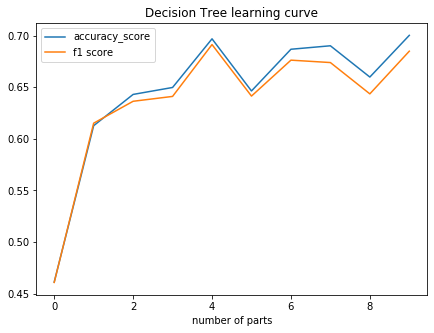

In [30]:
#2. Decision Tree

tree = search_tree.best_estimator_
accuracy_scores_tree = list()
f1_scores_tree = list()
for i in range(len(train_parts)):
    X, y = train_parts[i], train_labels[i]
    tree.fit(X, y)
    y_pred = tree.predict(X_test_norm)
    accuracy_scores_tree.append(accuracy_score(y_test, y_pred))
    f1_scores_tree.append(f1_score(y_test, y_pred, average='macro'))

x = np.arange(10)
plt.plot(x, accuracy_scores_tree, label='accuracy_score')
plt.plot(x, f1_scores_tree, label='f1 score')
plt.xlabel('number of parts')
plt.title('Decision Tree learning curve')
plt.legend()

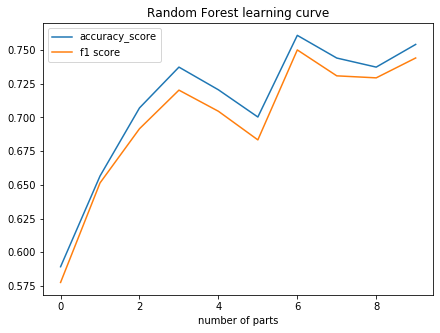

In [31]:
#3. Random Forest

rf = RandomForestClassifier(n_estimators=n_opt_rf, n_jobs=-1)
accuracy_scores_rf = list()
f1_scores_rf = list()
for i in range(len(train_parts)):
    X, y = train_parts[i], train_labels[i]
    rf.fit(X, y)
    y_pred = rf.predict(X_test_norm)
    accuracy_scores_rf.append(accuracy_score(y_test, y_pred))
    f1_scores_rf.append(f1_score(y_test, y_pred, average='macro'))

x = np.arange(10)
plt.plot(x, accuracy_scores_rf, label='accuracy_score')
plt.plot(x, f1_scores_rf, label='f1 score')
plt.xlabel('number of parts')
plt.title('Random Forest learning curve')
plt.legend()